In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os

In [2]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [35]:
det = chardet.detect(open('../../_data/data_dengue_peru.csv', 'rb').read())
charenc = det['encoding']

In [36]:
main_data = pd.read_csv('../../_data/data_dengue_peru.csv', encoding=charenc, low_memory=False)

In [37]:
main_data["Ubigeo_String"] = main_data["Ubigeo"].astype(str)

main_data["Ubigeo_Largo"] = main_data["Ubigeo_String"].str.len()

In [38]:
df5 = main_data[main_data["Ubigeo_Largo"] == 5]
df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_27496\3164714844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)


In [39]:
df6 = main_data[main_data["Ubigeo_Largo"] == 6]

In [40]:
new_data = pd.concat([df5, df6])

In [41]:
new_data["Ubigeo_Departamento"] = new_data["Ubigeo_String"].str[0:2]
new_data["Ubigeo_Provincia"] = new_data["Ubigeo_String"].str[0:4]

In [63]:
new_data_2021= new_data[new_data["Año"] == 2021]
new_data_2021.Casos = new_data_2021.Casos.fillna(0).replace(',', '', regex=True).astype(int)

C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_27496\3161228363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_2021.Casos = new_data_2021.Casos.fillna(0).replace(',', '', regex=True).astype(int)


In [54]:
dist_2021_dengue = new_data_2021.groupby( ['Ubigeo_String'], as_index = False )[['Casos']] \
                            .sum()

In [56]:
dist_2021_dengue = dist_2021_dengue.rename(columns={'Ubigeo_String': 'UBIGEO'})


In [57]:
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [58]:
maps = maps[['UBIGEO', 'geometry']]
maps['UBIGEO'] = maps['UBIGEO']


In [59]:
map_dist = maps.merge(dist_2021_dengue, how="outer", on="UBIGEO")
map_dist

,UBIGEO,geometry,Casos
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN
...,...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",NaN
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN


<Axes: >

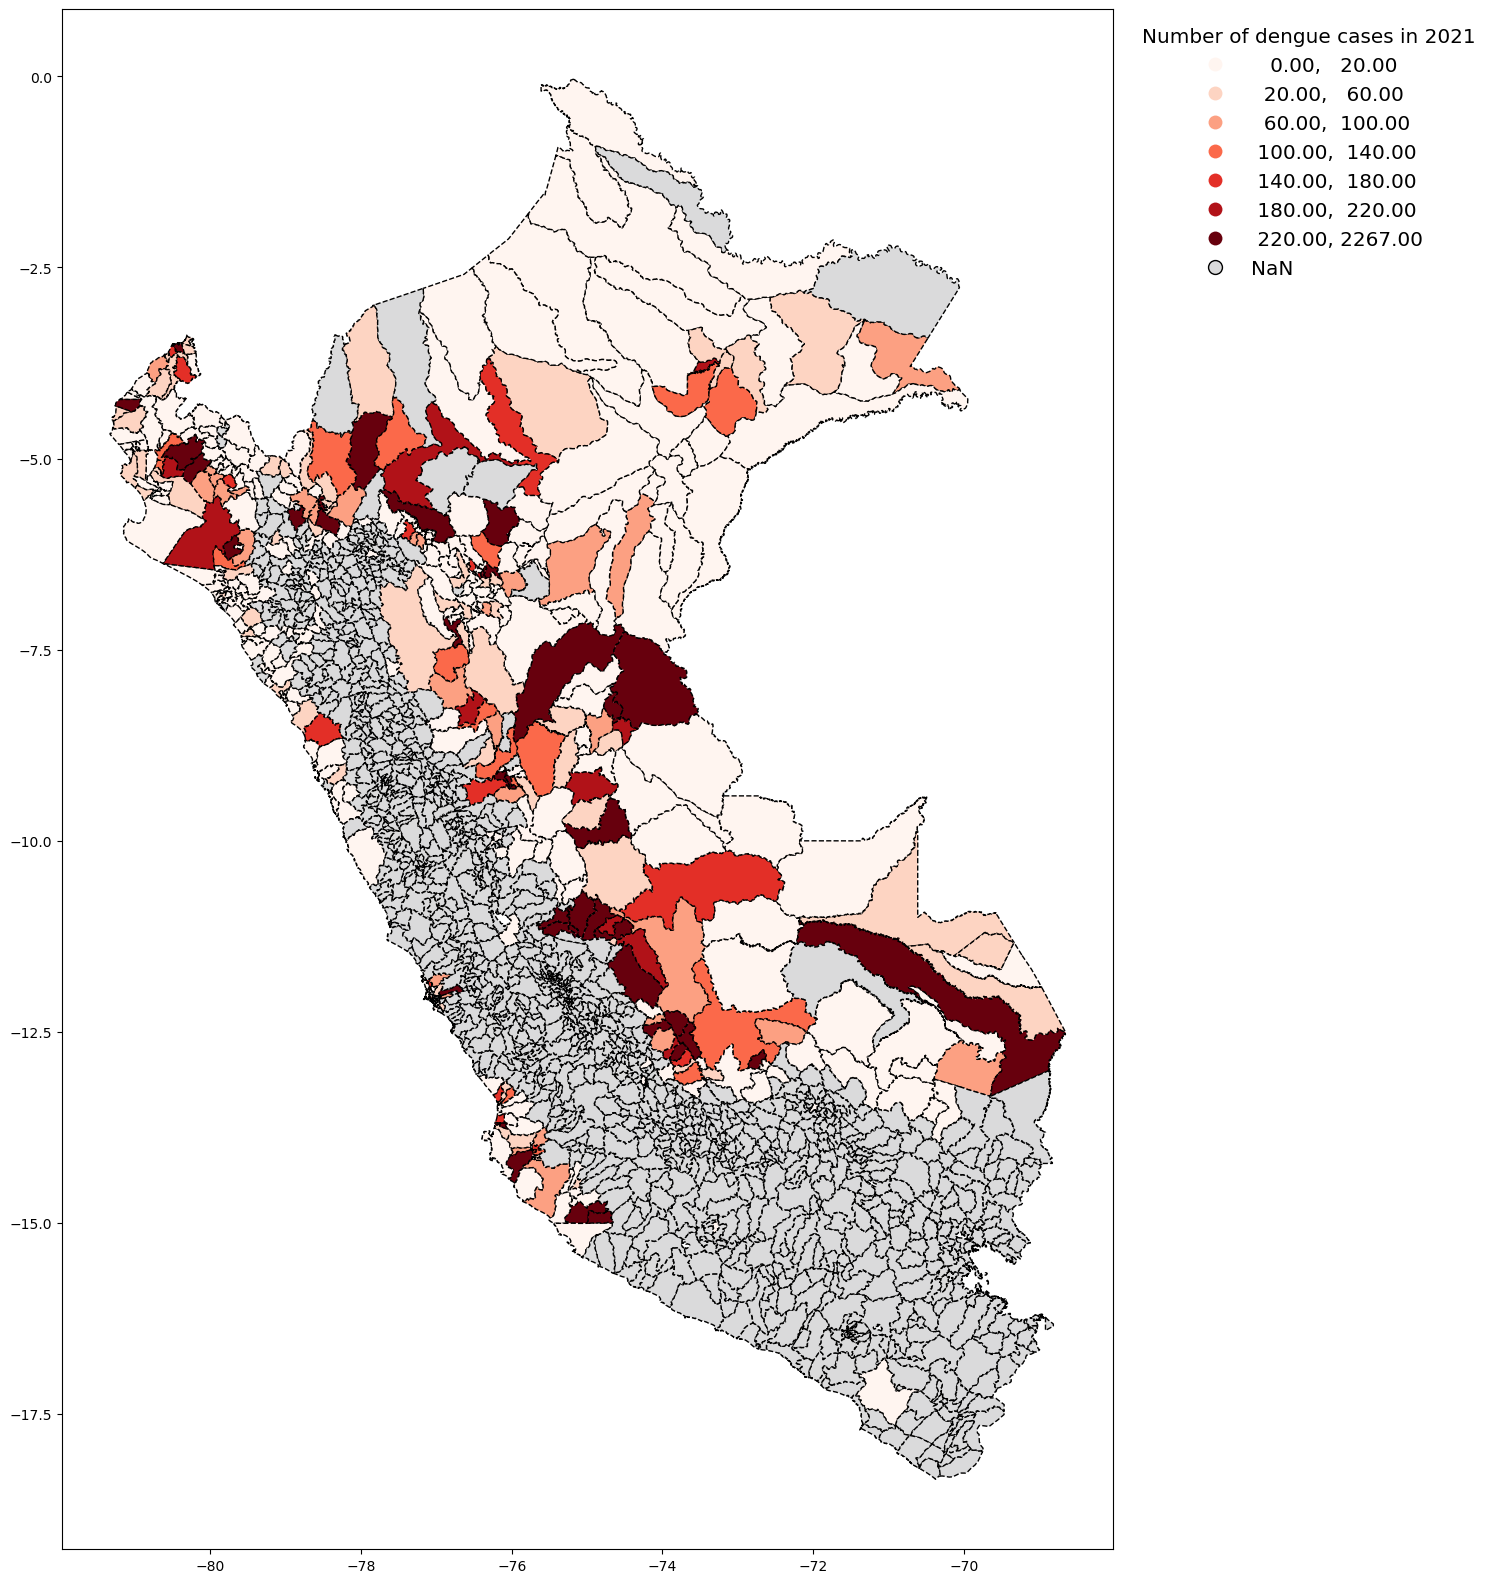

In [60]:
map_dist.plot( column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True,
              scheme = "User_Defined", 
          missing_kwds= dict(color = "#DADADB",), 
          classification_kwds = dict( bins = [ 20, 60, 100, 140, 180, 220] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False ) )

4. Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [65]:
prov_2021_dengue = new_data_2021.groupby( ['Ubigeo_Provincia'], as_index = False )[['Casos']]\
  .sum()

In [66]:
maps2 = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [67]:
maps2["Ubigeo_Provincia"] = maps2["UBIGEO"].str[0:4]

In [68]:
maps2 = maps2[['Ubigeo_Provincia', 'geometry']]

In [70]:
map_prov = maps2.merge(prov_2021_dengue, how="outer", on="Ubigeo_Provincia")

<Axes: >

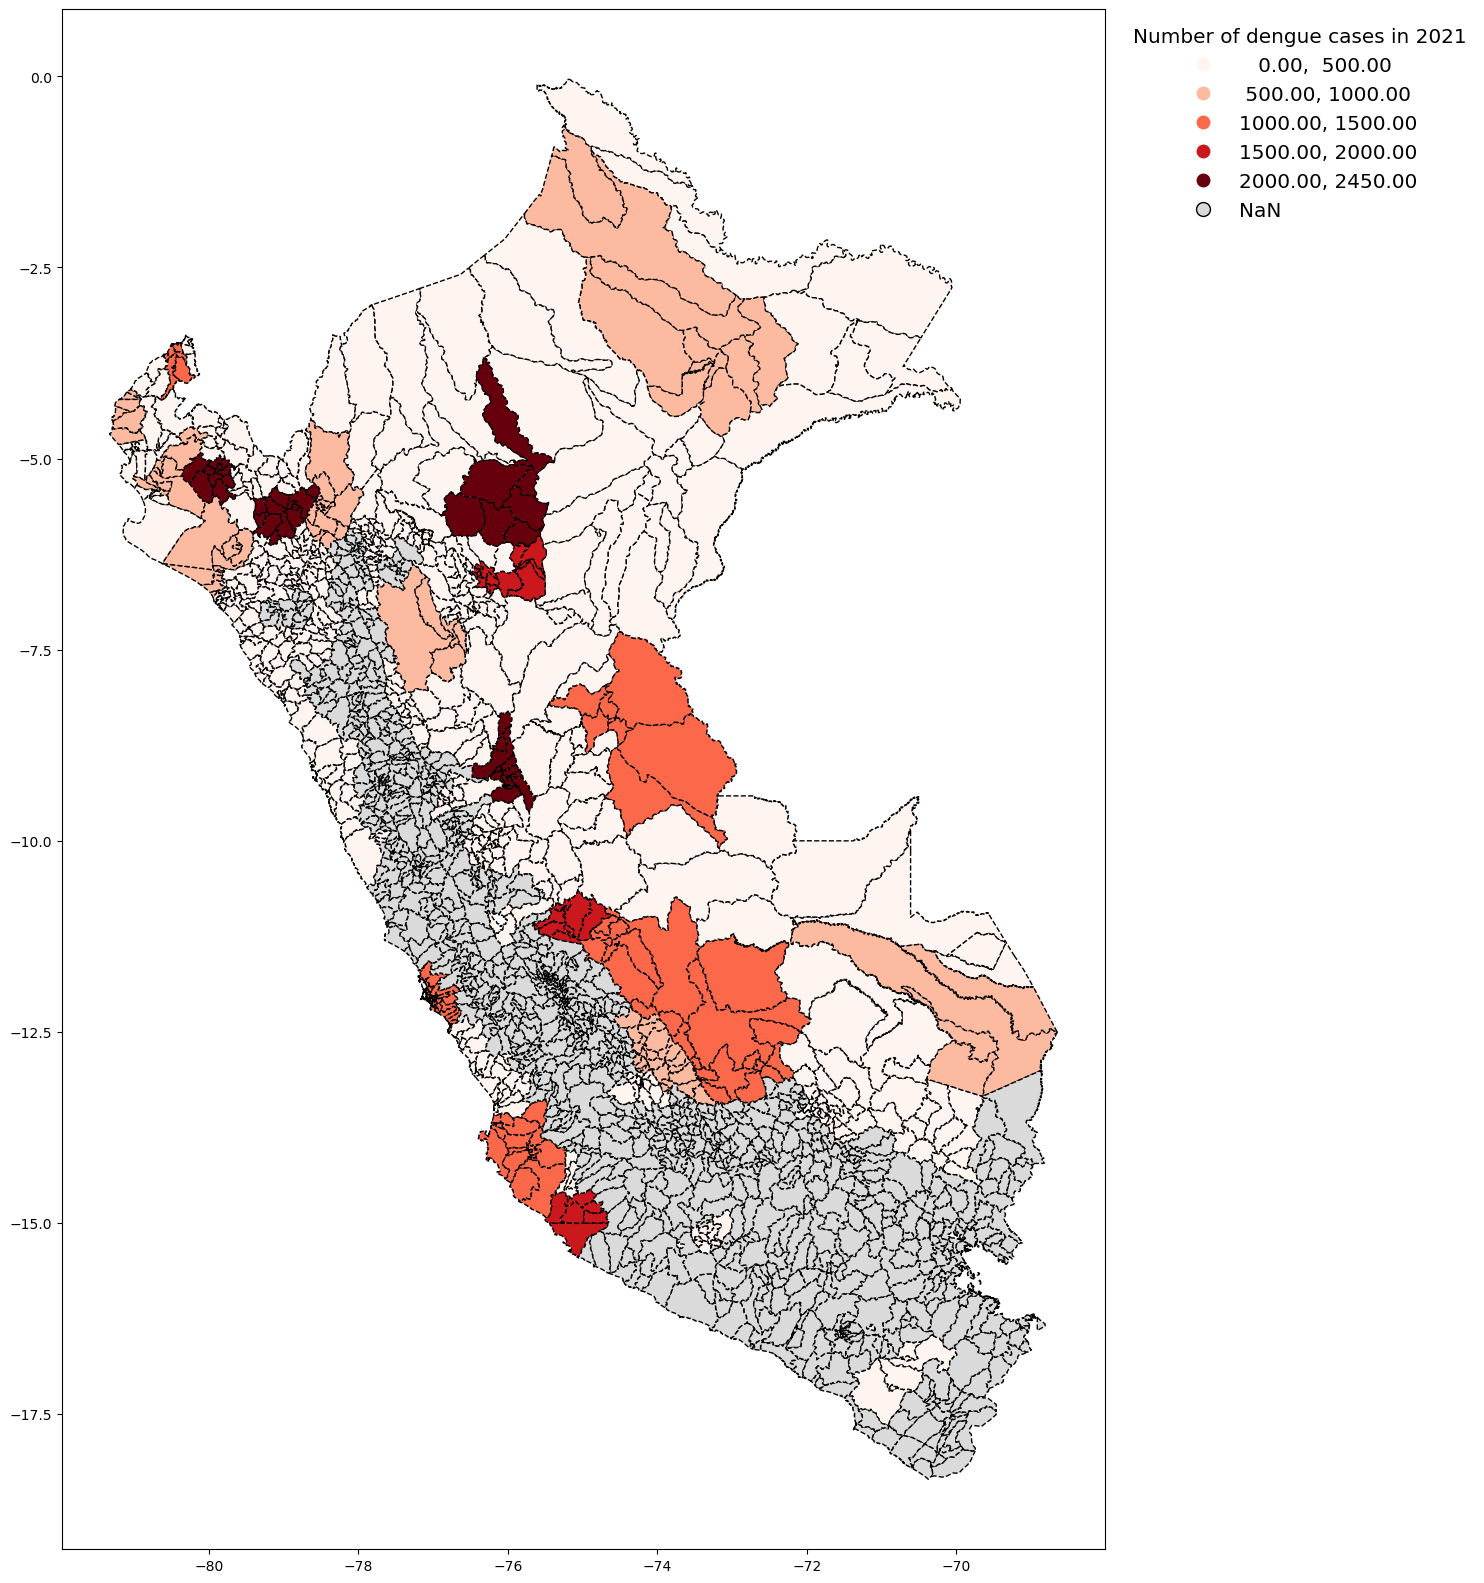

In [71]:
map_prov.plot( column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True,
              scheme = "User_Defined", 
          missing_kwds= dict(color = "#DADADB",), 
          classification_kwds = dict( bins = [ 500, 1000, 1500, 2000] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False )          )